# PME3481 - Controle e Aplicações

## Métodos de Ziegler-Nichols

### Preparção do Ambiente

In [106]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctl

### Métodos de Ziegler-Nichols

In [107]:
def ziegler_nichols_open_loop(G):
    T, yout = ctl.step_response(G)
    
    # Encontrar a maior inclinação
    dydt = np.gradient(yout, T)
    max_slope_index = np.argmax(dydt)
    max_slope = dydt[max_slope_index]
    
    # Encontrar o tempo de atraso (L) e a constante de tempo (T)
    L = T[max_slope_index]
    T_constant = (yout[-1] - yout[0]) / max_slope
    
    # Calcular os parâmetros PID
    Kp = 1.2 * (T_constant / L)
    Ti = 2 * L
    Td = 0.5 * L
    
    Ki = Kp / Ti
    Kd = Kp * Td
    
    return Kp, Ki, Kd

def ziegler_nichols_closed_loop(G):
    Kp = 1.0
    Ku = None
    Pu = None

    while True:
        pid = ctl.TransferFunction([Kp], [1])
        system = ctl.feedback(pid * G, 1)
        T, yout = ctl.step_response(system)
        
        if np.max(yout) > 1.1 * np.min(yout):
            Ku = Kp
            Pu = 2 * np.pi / np.arccos(-1 / (Ku * ctl.dcgain(G)))
            break
        Kp += 0.1
    
    Kp = 0.6 * Ku
    Ti = 0.5 * Pu
    Td = 0.125 * Pu
    
    Ki = Kp / Ti
    Kd = Kp * Td
    
    return Kp, Ki, Kd

Aplicando o Método

In [108]:
# # Define the plant transfer function (example: second-order system)
# G = ctl.tf([-9.79273731153111,- 4.89636863484562, + 157.678706348201,78.8393531688707],[1,4,5.25,2.75,0.5])

# Ku = 0.35
# Pu = 2 * np.pi / np.arccos(-1 / (Ku * ctl.dcgain(G)))
    
# # Calculate Ziegler-Nichols PID parameters
# Kp_cl = 0.6 * Ku
# Ti = 0.5 * Pu
# Td = 0.125 * Pu

# Ki_cl = Kp_cl / Ti
# Kd_cl = Kp_cl * Td

# # Closed-Loop Method
# print(f'Closed-Loop Method PID parameters: Kp = {Kp_cl}, Ki = {Ki_cl}, Kd = {Kd_cl}')

# # Plot the step response for both methods
# pid_cl = ctl.TransferFunction([Kd_cl, Kp_cl, Ki_cl], [1, 0])
# system_cl = ctl.feedback(pid_cl * G, 1)
# T_cl, yout_cl = ctl.step_response(system_cl)

# plt.figure()
# plt.plot(T_cl, yout_cl, label='Closed-Loop Method')
# plt.xlabel('Time (s)')
# plt.ylabel('Response')
# plt.title('Step Response with Ziegler-Nichols PID Controller')
# plt.legend()
# plt.grid(True)
# plt.show()

In [109]:
# Ku = 0.034
# Pu = 2 * np.pi / np.arccos(-1 / (Ku * ctl.dcgain(G)))
    
# # Calculate Ziegler-Nichols PID parameters
# Kp = 0.6 * Ku
# Ti = 0.5 * Pu
# Td = 0.125 * Pu
    
# Ki = Kp / Ti
# Kd = Kp * Td

# print(Kd, Ki, Kp, Pu)

# print(ctl.dcgain(G)*0.00635)

### Método da Oscilação Contínua

Closed-Loop Method PID parameters: Kp = 0.0042, Ki = 0.0036156984844154592, Kd = 0.0012196813476035608


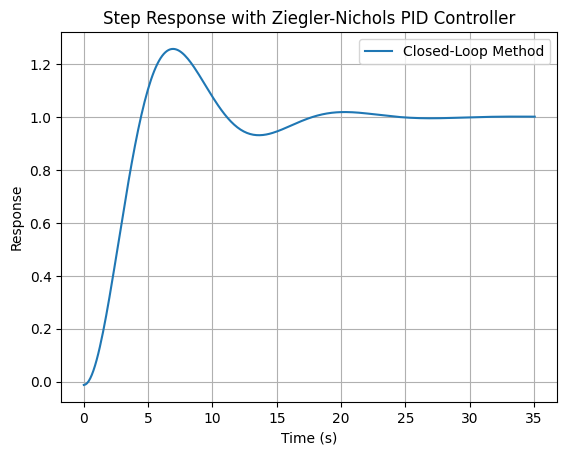

In [114]:
# Define the plant transfer function
G = ctl.tf([-9.79273731153111,-4.89636863484562,157.678706348201,78.8393531688707], [1,4,5.25,2.75,0.5])

Ku = 0.007
Pu = 2 * np.pi / np.arccos(-1 / (Ku * ctl.dcgain(G)))

# Calculate Ziegler-Nichols PID parameters
Kp_cl = 0.6 * Ku
Ti_cl = 0.5 * Pu
Td_cl = 0.125 * Pu

Ki_cl = Kp_cl / Ti_cl
Kd_cl = Kp_cl * Td_cl

print(f'Closed-Loop Method PID parameters: Kp = {Kp_cl}, Ki = {Ki_cl}, Kd = {Kd_cl}')

# Plot the step response for the closed-loop method
pid_cl = ctl.TransferFunction([Kd_cl, Kp_cl, Ki_cl], [1, 0])
system_cl = ctl.feedback(pid_cl * G, 1)
T_cl, yout_cl = ctl.step_response(system_cl)

plt.figure()
plt.plot(T_cl, yout_cl, label='Closed-Loop Method')
plt.xlabel('Time (s)')
plt.ylabel('Response')
plt.title('Step Response with Ziegler-Nichols PID Controller')
plt.legend()
plt.grid(True)
plt.show()

### Método do Degrau

Open-Loop Method PID parameters: Kp = 2.6098074657811177, Ki = 0.6780310083981502, Kd = 2.5113508541954763


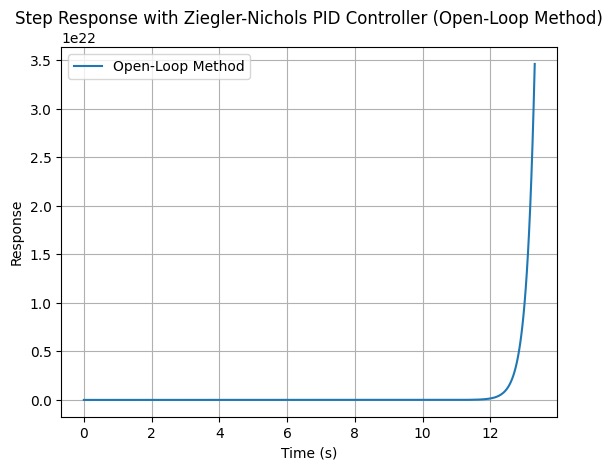

In [116]:
# Parâmetros do método do degrau
Kp_ol, Ki_ol, Kd_ol = ziegler_nichols_open_loop(G)

print(f'Open-Loop Method PID parameters: Kp = {Kp_ol}, Ki = {Ki_ol}, Kd = {Kd_ol}')

# Plotar a resposta ao degrau para o método do degrau
pid_ol = ctl.TransferFunction([Kd_ol, Kp_ol, Ki_ol], [1, 0])
system_ol = ctl.feedback(pid_ol * G, 1)
T_ol, yout_ol = ctl.step_response(system_ol)

plt.figure()
plt.plot(T_ol, yout_ol, label='Open-Loop Method')
plt.xlabel('Time (s)')
plt.ylabel('Response')
plt.title('Step Response with Ziegler-Nichols PID Controller (Open-Loop Method)')
plt.legend()
plt.grid(True)
plt.show()